
## Задание 1

<div style="border: 1px solid; padding: 15px;">
    
Как хорошо Вы владеете Python?

Думаю, что знаю Python на **7**. Так как на 8-10 должен иметься большой опыт за плечами, когда человек знает все нужные ему в работе функции "на подкорке", знает какие-то нюансы языка. Сейчас у меня данного навыка нет. Например, я знаю про существование встроенной функции, которая выполняет определеные преобразования, но не помню как она называется, поэтому приходится гуглить. Насчет нюансов... Можно привести в пример скорость работы loc и query, loc работает быстрее, но порой реализация кода на нем будет очень массивной и трудночитаемой, имхо.

Насколько хорошо Вы знакомы с Google Sheets?

Я думаю, что знаком с Google Sheets на 4-5, так как пока плохо знаю JS. И в вузе для автоматизации расчетов использовал Excel. Но основные функции в гугл таблицах похожи на Excel.

## Задание 2

<div style="border: 1px solid; padding: 15px;">
    
### Задача 1


In [1]:
print(f'Осталось долларов: {(40/2) * (1/5)}')

Осталось долларов: 4.0


<div style="border: 1px solid; padding: 15px;">

### Задача 2


In [2]:
#Доллар за час для 1 кампании
one_hour = (120/5) / (24*6)

# Количество дней
days = 216 / (8*9*one_hour)

print(f'Количество дней: {days}')

Количество дней: 18.0


<div style="border: 1px solid; padding: 15px;">

### Задача 3

In [3]:
print(f'Количество баннеров, использованных в обеих рекламных компаниях: {(200-80-60) / 4}')

Количество баннеров, использованных в обеих рекламных компаниях: 15.0


<div style="border: 1px solid; padding: 15px;">

### Задача 4
    
|          | Instagram         | Facebook           | Youtube            |
|----------|-------------------|--------------------|--------------------|
| Энн      | ✅                | ❌                | ✅                 |
| Джон     | ❌                | ✅                | ✅                 |
| Кейт     | ❌                | ✅                | ✅                 |
| Том      | ✅                | ✅                | ❌                 |
    
Предпочтения совпадают у Джона и Кейт

<div style="border: 1px solid; padding: 15px;">

### Задача 5

In [4]:
print(f'За 5-й модуль необходимо получить {(5*80) - (78*4)} баллов')

За 5-й модуль необходимо получить 88 баллов


<div style="border: 1px solid; padding: 15px;">

### Задача 6

In [5]:
print(f'Обратный путь быстрее на {round((260/80 - 260/100) * 60, 3)} минут')

Обратный путь быстрее на 39.0 минут


## Задание 3

### Цель работы: 

1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.
2) Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.
3) Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?
4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?
5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?
6) Рассчитать бонусы менеджеров



### Описание данных: 
Файл **data.xlsx** содержит:

- `client_id` - ID клиента;
- `sum` – сумма денежных средств;
- `status` – статус оплаты;
- `sale` – менеджер, заключивший сделку;
- `new/current` – статус сделки;
- `receiving_date` – дата получения оригинала договора.


### Используемые библиотеки и модули

In [6]:
import pandas as pd
import datetime as dt

import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_theme(rc={'figure.figsize':(12, 6)})

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [7]:
# Загрузка данных
data = pd.read_excel('data.xlsx')
data

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


### Предобработка

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


<div style="border: 1px solid; padding: 15px;">

Всего в данных  730 строк    
    
В данных присутсвуют пропуски, столбец `Unnamed: 5` полностью пуст. Скорее всего ошибка в выгрузке данных
    
Проверим отсутствие неявных дубликатов в данных

In [9]:
data['status'].unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

In [10]:
data['sale'].unique()

array([nan, '-', 'Петрова', 'Иванов', 'Кузнецова', 'Андреев',
       'Филимонова', 'Селиванов', 'Смирнов', 'Васильев', 'Соколов',
       'Михайлов', 'Попов'], dtype=object)

In [11]:
data['new/current'].unique()

array([nan, '-', 'новая', 'текущая'], dtype=object)

In [12]:
data['document'].unique()

array([nan, '-', 'оригинал', 'НЕТ'], dtype=object)

In [13]:
data['sale'].unique()

array([nan, '-', 'Петрова', 'Иванов', 'Кузнецова', 'Андреев',
       'Филимонова', 'Селиванов', 'Смирнов', 'Васильев', 'Соколов',
       'Михайлов', 'Попов'], dtype=object)

In [14]:
data['new/current'].unique()

array([nan, '-', 'новая', 'текущая'], dtype=object)

In [15]:
data['document'].unique()

array([nan, '-', 'оригинал', 'НЕТ'], dtype=object)

<div style="border: 1px solid; padding: 15px;">
    
Неявные дубликаты отсутствуют

In [16]:
# Создадим функцию, которая будет выдавать месяц и год оплаты для каждого заказа
# Надеюсь... я правильно понял, что эти даты и есть даты, когда поступила опалата
def pay_date(database):
    
    # Создаем столбец с годом и месяцем оплаты
    monthes = database[(database.isna().sum(axis=1) > 5)]['status']
    for i in monthes.index:
        database.loc[i:, 'pay_date'] = database.iloc[i]['status']
        
    # Меняем алфавитное название на численное    
    database = database.replace({'pay_date':{
                                            'Май 2021' : '2021-05', 
                                            'Июнь 2021' : '2021-06', 
                                            'Июль 2021' : '2021-07',
                                            'Август 2021' : '2021-08',
                                            'Сентябрь 2021' : '2021-09',
                                            'Октябрь 2021' : '2021-10'
                                        }})
    return database

In [17]:
data = pay_date(data)
data

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,pay_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN,2021-05
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-,2021-05
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00,2021-05
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,2021-05
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,2021-05
...,...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00,2021-10
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN,2021-10
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN,2021-10
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00,2021-10


In [18]:
pd.DataFrame(data.isna().sum()).rename(columns={0:'Количество пропусков'}).style.background_gradient('coolwarm')

,Количество пропусков
client_id,6
sum,6
status,0
sale,6
new/current,6
Unnamed: 5,730
document,21
receiving_date,123
pay_date,0


In [19]:
pd.DataFrame(data.isna().mean()*100).rename(columns={0:'Процент пропусков'}).style.background_gradient('coolwarm')

,Процент пропусков
client_id,0.821918
sum,0.821918
status,0.000000
sale,0.821918
new/current,0.821918
Unnamed: 5,100.000000
document,2.876712
receiving_date,16.849315
pay_date,0.000000


<div style="border: 1px solid; padding: 15px;">

Присутствует пустой столбец, удалим его

In [20]:
data = data.drop('Unnamed: 5', axis=1)
data

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,2021-05
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,2021-05
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,2021-05
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021-05
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021-05
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,2021-10
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,2021-10
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,2021-10
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,2021-10


In [21]:
data[(data.isna().sum(axis=1) > 5)]

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,2021-05
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN,2021-06
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN,2021-07
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaN,2021-08
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaN,2021-09
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaN,2021-10


<div style="border: 1px solid; padding: 15px;">

Удалим строку с месяцем и годом

In [22]:
data = data[~(data.isna().sum(axis=1)>5)].reset_index(drop=True)
data

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date
0,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,2021-05
1,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,2021-05
2,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021-05
3,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021-05
4,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,2021-05
...,...,...,...,...,...,...,...,...
719,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,2021-10
720,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,2021-10
721,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,2021-10
722,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,2021-10


<div style="border: 1px solid; padding: 15px;">

Удалим внутренние переводы

In [23]:
data = data[~(data['status']=='ВНУТРЕННИЙ')].reset_index(drop=True)
#data

In [24]:
pd.DataFrame(data.isna().sum()).rename(columns={0:'Количество пропусков'}).style.background_gradient('coolwarm')

,Количество пропусков
client_id,0
sum,0
status,0
sale,0
new/current,0
document,15
receiving_date,117
pay_date,0


<div style="border: 1px solid; padding: 15px;">

Пропуски остались только в столбцах `receiving_date` и `document` 

In [25]:
data['client_id'] = data['client_id'].astype('int64')
data['receiving_date'] = pd.to_datetime(data['receiving_date'], format='%Y-%m-%dT%H:%M:%S')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       723 non-null    int64         
 1   sum             723 non-null    float64       
 2   status          723 non-null    object        
 3   sale            723 non-null    object        
 4   new/current     723 non-null    object        
 5   document        708 non-null    object        
 6   receiving_date  606 non-null    datetime64[ns]
 7   pay_date        723 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 45.3+ KB


In [27]:
print(f"Количество дубликатов: {data.duplicated().sum()}")

Количество дубликатов: 14


In [28]:
data[data.duplicated()]

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date
17,43,1961.2,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-27,2021-05
51,96,1266.2,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-07-16,2021-05
96,204,1473.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-07-01,2021-05
177,97,1506.2,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-09-01,2021-06
221,204,1523.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-07-21,2021-06
271,311,2063.7,ОПЛАЧЕНО,Соколов,текущая,оригинал,2021-09-28,2021-07
328,204,1611.2,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-20,2021-07
347,319,4208.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-09-21,2021-07
437,204,1611.2,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-09-16,2021-08
457,319,4561.2,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-10-21,2021-08


<div style="border: 1px solid; padding: 15px;">

В данных присутствует 14 дубликатов. Удалим их.

P.S.: Возможно, это 2 похожих договора, заключенных в 1 день c одним и тем же клиентом, и оплата по которым поступила в один и тот же месяц. Здесь необходимо понимание кода выгрузки данных или экспертное мнение.

In [29]:
data = data.drop_duplicates().reset_index(drop=True)

In [30]:
print(f"Количество дубликатов: {data.duplicated(['client_id', 'sum', 'receiving_date', 'pay_date'])
                                    .sum()}")

data[data.duplicated(['client_id', 'sum', 'receiving_date', 'pay_date'])]

Количество дубликатов: 1


,client_id,sum,status,sale,new/current,document,receiving_date,pay_date
706,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,2021-10


In [31]:
client_id = data[data.duplicated(['client_id', 'sum', 'receiving_date', 
                                  'sale', 'new/current', 'pay_date'])]['client_id'].values

In [32]:
data.query('client_id == @client_id')

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date
705,360,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,2021-10
706,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,2021-10


<div style="border: 1px solid; padding: 15px;"> 

Присутствуют 2 похожих договора, но с разным статусом. Возможно, здесь имеется ошибка в системе учета. Но точно сказать об этом нельзя

In [33]:
data[data['document'].isna()]

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date
44,87,9948.7,ОПЛАЧЕНО,Смирнов,новая,NaN,2021-06-17,2021-05
45,90,16123.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-28,2021-05
46,91,1053.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-28,2021-05
89,198,4458.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-01,2021-05
182,115,298.7,ОПЛАЧЕНО,Андреев,текущая,NaN,2021-07-14,2021-06
326,228,2193.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-10-06,2021-07
363,32,7101.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,2021-10-06,2021-08
396,90,8454.2,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-09-20,2021-08
439,339,7553.7,ОПЛАЧЕНО,Петрова,новая,NaN,2021-10-11,2021-08
445,256,2351.2,ОПЛАЧЕНО,Филимонова,текущая,NaN,NaT,2021-08


In [34]:
#Процент денежных средств у данных с пропуском в столбце `document` относительно всех данных
data[data['document'].isna()]['sum'].sum() / data['sum'].sum() * 100

1.853473523640996

In [35]:
pd.DataFrame(data.isna().mean()*100).rename(columns={0:'Процент пропусков'}).style.background_gradient('coolwarm')

,Процент пропусков
client_id,0.000000
sum,0.000000
status,0.000000
sale,0.000000
new/current,0.000000
document,2.115656
receiving_date,16.220028
pay_date,0.000000


In [36]:
data[data['document'] == "НЕТ"]['receiving_date'].unique()

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

<div style="border: 1px solid; padding: 15px;">
    
Заметим, что оригиналы отсутствуют в тех данных, в которых не указана дата в столбце `receiving_date`

<div style="border: 1px solid; padding: 15px;">

Процент денежных средств у данных с пропуском в столбце `document` относительно всех данных составляет 1.8%. А процентное количество данных с пропуском составляет 2.1%.

Можно предположить, что менеджер забыл указать данное поле при заполении анкеты. Заменим пропуски на `оригинал` для тех данных, у которых есть дата получения оригинала договора, для остальных данных поставим `НЕТ`.

P.S.: Тут снова необходимо понимать причины возникновения пропусков, возможно, менеджер забыл указать данные...

In [37]:
data.loc[(data['document'].isna()) & (data['receiving_date'].isna()), 'document'] = 'НЕТ'
data['document'] = data['document'].fillna('оригинал')
data[data['document'].isna()]

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       709 non-null    int64         
 1   sum             709 non-null    float64       
 2   status          709 non-null    object        
 3   sale            709 non-null    object        
 4   new/current     709 non-null    object        
 5   document        709 non-null    object        
 6   receiving_date  594 non-null    datetime64[ns]
 7   pay_date        709 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 44.4+ KB


<div style="border: 1px solid; padding: 15px;">

В ходе предобработки был создан столбец `pay_date` c месяцем и годом оплаты. Было уменьшено количество пропусков, а также найдены и удалены дубликаты. Оставлены пропуски в столбце `receiving_date`

Таким образом, осталось 709 строк данных

### Анализ данных

#### Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [39]:
july_sum = data.query('status != "ПРОСРОЧЕНО" and pay_date == "2021-07"')['sum'].sum()
print(f'Выручку за июль 2021: \033[1m{july_sum:.0f}\033[0m')

Выручку за июль 2021: 852013


#### Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [40]:
# Сгруппируем по месяцам оплаты
monthes_sum = data.groupby('pay_date', as_index=False)['sum'].sum()
monthes_sum['sum'] = monthes_sum['sum'] * 10**-6
monthes_sum['sum']

0    0.793177
1    0.807236
2    0.853991
3    0.844263
4    0.818524
5    1.001063
Name: sum, dtype: float64

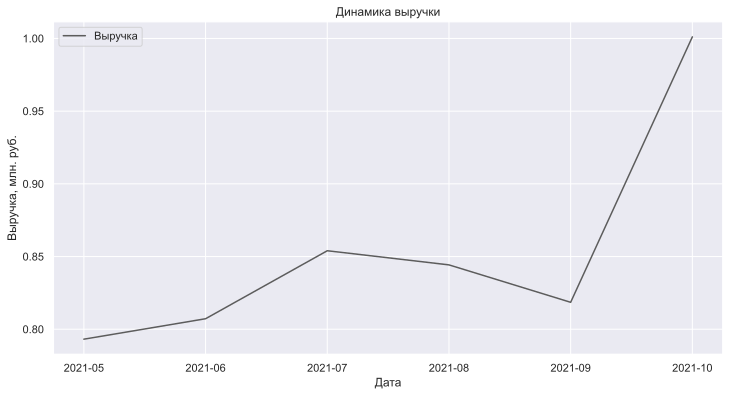

In [41]:
fig = sns.lineplot(data=monthes_sum,
                   x='pay_date', 
                   y='sum',
                   color='#5c5c5c',
                   label='Выручка')

fig.set(xlabel='Дата',
        ylabel='Выручка, млн. руб.',
        title='Динамика выручки')

plt.show()

<div style="border: 1px solid; padding: 15px;">


Выручка на май 2021 года составляет **793 000** рублей, к июлю выручка возросла до **844 000** рублей. После присутствует небольшой спад до <br>**818 000** рублей к сентябрю. В октябре наблюдается скачок до **1 млн.** рублей. Это может быть связано с окончанием финансового года.

#### Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [42]:
manager_sum = data[data['pay_date'] == '2021-09'].pivot_table(index='sale', 
                                                              values='sum', 
                                                              aggfunc='sum')

manager_sum.sort_values('sum', ascending=False).style.background_gradient('coolwarm')

,sum
sale,
Смирнов,220672.000000
Петрова,149344.460000
Андреев,132646.300000
Иванов,94770.600000
Кузнецова,72228.400000
Филимонова,59514.470000
Васильев,49895.450000
Соколов,35183.500000
Михайлов,4268.700000


<div style="border: 1px solid; padding: 15px;">


Наибольшее количество средств привлек менеджер Смирнов

#### Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [43]:
(data[data['pay_date'] == '2021-10'].groupby('new/current', as_index=False)['client_id']
                                    .count()
                                    .rename(columns={'client_id':'number'}))

,new/current,number
0,новая,35
1,текущая,98


<div style="border: 1px solid; padding: 15px;">

В октябре 2021 преобладающим типом сделок были `текущие`. Их количество составило 98 сделок

#### Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [44]:
data.query('document == "оригинал" and pay_date == "2021-05" and\
                "2021-06-01" <= receiving_date <= "2021-06-30"')

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date
1,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-05
2,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-05
6,23,8511.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-08,2021-05
7,24,16347.7,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-06-23,2021-05
8,28,10537.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-16,2021-05
...,...,...,...,...,...,...,...,...
115,266,3363.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-23,2021-05
116,270,5288.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-06-07,2021-05
117,273,10133.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-01,2021-05
118,274,26033.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-22,2021-05


In [45]:
len(data.query('document == "оригинал" and pay_date == "2021-05" and\
                "2021-06-01" <= receiving_date <= "2021-06-30"'))

77

<div style="border: 1px solid; padding: 15px;">

В июле 2021 года было получено **77** оригиналов за майский период

#### Рассчет бонусов менеджеров

In [46]:
def bonus(row):
    # Индексы начисления бонусов
    index_new = 0.07
    index_current_big = 0.05
    index_current_lower = 0.03
    
    # Проверяем на условия начисления бонусов
    if ((row['new/current'] == 'новая') and
        (row['status'] == 'ОПЛАЧЕНО')):
        return row['sum'] * index_new
    
    if ((row['new/current'] == 'текущая') and 
        (row['status'] != 'ПРОСРОЧЕНО')):
            if row['sum'] > 10000 :
                return row['sum'] * index_current_big
            else:
                return row['sum'] * index_current_lower
    return 0

In [47]:
data['bonus'] = data.apply(bonus, axis=1)
data

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date,bonus
0,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,2021-05,381.689
1,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-05,699.585
2,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-05,21.591
3,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,2021-05,127.611
4,20,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,2021-05,173.901
...,...,...,...,...,...,...,...,...,...
704,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,2021-10,129.861
705,360,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,2021-10,216.734
706,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,2021-10,0.000
707,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,2021-10,308.259


In [48]:
# Дата рассмотрения по остаткам бонусов
date_last = '2021-07'

balance_bonus = data[~(data['receiving_date'] < date_last) & (data['pay_date'] < date_last)]
balance_bonus 

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date,bonus
0,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,2021-05,381.689
3,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,2021-05,127.611
4,20,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,2021-05,173.901
5,21,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13,2021-05,108.411
10,32,7353.9,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09,2021-05,220.617
...,...,...,...,...,...,...,...,...,...
245,281,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22,2021-06,172.011
246,282,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16,2021-06,66.759
247,284,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08,2021-06,0.000
248,286,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22,2021-06,103.611


In [49]:
balance_bonus[balance_bonus['receiving_date'].isna()]

,client_id,sum,status,sale,new/current,document,receiving_date,pay_date,bonus
240,266,3363.7,ОПЛАЧЕНО,Петрова,текущая,НЕТ,NaT,2021-06,100.911


<div style="border: 1px solid; padding: 15px;">
    
Решил использовать такой метод, так как в столбце `receiving_date` присуствуют пропуски. Следовательно, оригиналы по этим договорам еще не отправили, но оплату могли уже совершить.

In [50]:
# Остаток каждого менеджера
balance_bonus = balance_bonus.pivot_table(index='sale', values='bonus', aggfunc='sum').sort_values('bonus', ascending=False)
balance_bonus.style.background_gradient('coolwarm')

,bonus
sale,
Петрова,10871.658400
Смирнов,7401.822000
Иванов,5991.452000
Селиванов,5238.854000
Кузнецова,4496.950100
Андреев,3864.868700
Филимонова,2317.957900
Васильев,953.877000
Соколов,269.211000


Самая большая сумма остатка у менеджера **Петрова**, остаток составил **10871** рубль

### Выводы

**Предобработка**

В ходе предобработки был создан столбец `pay_date` c месяцем и годом оплаты. Найдены и удалены дубликаты. Пропуски оставлены только в столбце `receiving_date`. Таким образом, осталось 709 строк данных.

**Анализ данных** 

Выручку за июль 2021 по непросроченным договорам составила **852 013** рублей.

По динамике выручки можно заключить следующие:<br>Выручка на май 2021 года составляет **793 000** рублей, к июлю выручка возросла до **844 000** рублей. После присутствует небольшой спад до **818 000** рублей к сентябрю. В октябре наблюдается скачок до **1 млн.** рублей. Это может быть связано с окончанием финансового года.

Наибольшее количество средств привлек менеджер Смирнов.

В октябре 2021 преобладающим типом сделок были **текущие**. Их количество составило 98 сделок.

В июле 2021 года было получено **77** оригиналов за майский период.

**Остатки по бонусам**


|Менеджер   | Остаток, руб. |
|-----------|---------------|
|Петрова    | 10871         |
|Смирнов	| 7401          | 
|Иванов	    | 5991          |
|Селиванов	| 5238          |
|Кузнецова	| 4496          |
|Андреев	| 3864          |
|Филимонова	| 2317          |
|Васильев	| 953           |
|Соколов	| 269           |

Самая большая сумма остатка у менеджера **Петрова**, остаток составил **10871** рубль